# Module 2-2 Worksheet: Network Representation of Timeseries

## Part 1: Timeseries $\rightarrow$ Graph/Network

<font color = 'purple'>
    
*Once we are done talking through the slides from [the main module 2-2 notebook](2-2-GraphTimeSeries.ipynb), we will take some time to test out your understanding of the method by using the teaspoon functions to represent a timeseries signal as a network. We encourage talking to your neighbor. Please ask if you need help!* The relevant teaspoon functions have been imported below and documentation can be found [here](https://teaspoontda.github.io/teaspoon/index.html) if needed.
    
</font>

### Task: Compute the ordinal partition network and coarse grained state space network representations of the chaotic Lorenz system.

In [1]:
# Embedding/Simulation Functions
import teaspoon.MakeData.DynSysLib.DynSysLib as DSL
from teaspoon.SP.tsa_tools import takens

# Graph Teaspoon Functions

from teaspoon.SP.network import ordinal_partition_graph
from teaspoon.SP.network_tools import remove_zeros
from teaspoon.SP.network_tools import make_network
from teaspoon.TDA.PHN import DistanceMatrix, point_summaries, PH_network
from teaspoon.SP.network import cgss_graph
# from teaspoon.SP.network_tools import remove_zeros
# from teaspoon.SP.network_tools import make_network
import teaspoon.SP.tsa_tools as tsa_tools
from teaspoon.SP.tsa_tools import takens
import teaspoon.MakeData.DynSysLib.DynSysLib as DSL
from teaspoon.parameter_selection.MsPE import MsPE_tau, MsPE_n
from teaspoon.SP.network import ordinal_partition_graph

# Miscellaneous python functions
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from ripser import Rips
import networkx as nx

In [2]:

import sys, os
# sys.path.append(os.path.abspath('..'))
# from research.pkg.lib import *


# import mplfinance as mpf
# %matplotlib inline

import pandas as pd
import matplotlib as mpl

# plt.rcParams['lines.linewidth'] = 0.5 

# mpl.rcParams.update({'font.size': 4, 'lines.linewidth': 0.5, 'figure.dpi': 150})


In [3]:
pair = 'BTC_USDT'
timeframe = '8h'

exchange = 'binance'
odf = pd.read_json(f'../../freq-user-data/data/{exchange}/{pair}-{timeframe}.json'
# exchange = 'kucoin'
# odf = pd.read_json(f'../../freq-user-data/data/{exchange}/futures/{pair}-{timeframe}-futures.json'
).dropna().set_axis(['timestamp', 'open', 'high', 'low', 'close', 'volume'], axis=1
).assign(dtime=lambda x: pd.to_datetime(x['timestamp'], unit='ms', utc=False)
).set_index('dtime').sort_index()

print(odf.shape)
odf.tail(4)

(6343, 6)


,timestamp,open,high,low,close,volume
dtime,,,,,,
2023-06-01 00:00:00,1685577600000,27210.36,27350.00,26605.05,26802.67,15826.96228
2023-06-01 08:00:00,1685606400000,26802.66,26981.34,26782.53,26894.48,10757.24328
2023-06-01 16:00:00,1685635200000,26894.47,27175.00,26656.00,26817.93,12633.60324
2023-06-02 00:00:00,1685664000000,26817.93,27213.00,26505.00,27049.65,13872.68614


## Lorenz System Embedding

The Lorenz system used is defined as

\begin{align*}
\dot{x}&=\sigma (y-x),\\
\dot{y}&=x(\rho−z)−y,\\
\dot{z}&=xy-\beta z.
\end{align*}

In Teaspoon, The Lorenz system is solved with a sampling rate of 100 Hz for 100 seconds with only the last 20 seconds used to avoid transients. For a chaotic response, parameters of σ = 10.0, β = 8.0/3.0, and ρ = 105 and initial conditions [x0,y0,z0] = [10−10,0,1] are used. For a periodic response set ρ = 100.

### Step 1: Simulate the chaotic Lorenz System and estimate $\tau$ and $n$ using MSPE

**Hint:** Use ```
MsPE_tau, and MsPE_n
```

In [4]:
odf.iloc[-100:].shape

(100, 6)

In [70]:
# t, ts = DSL.DynamicSystems('lorenz', 'chaotic')

ts = odf.iloc[-300:][['close', 'low', 'high']].values.T
# Your code here

# tau_mspe =
# n_mspe = 


# print your parameters
tau_mspe = MsPE_tau(ts[0], delay_end=80)
n_mspe = MsPE_n(ts[0], tau_mspe)

print(tau_mspe, n_mspe)
    
# tau_mspe = 17
# n_mspe = 5

3 5


*The correct answer is hidden here. Highlight or double-click to open the cell to see it when you're ready.*

<font color='white'>
    
tau_mspe = MsPE_tau(ts[0])
n_mspe = MsPE_n(ts[0], tau_mspe)

print(tau_mspe, n_mspe)
    
tau_mspe = 17
n_mspe = 5
    
</font>

### Step 2: Obtain the ordinal partition network representation for this system.

Hint: 

```python
teaspoon.SP.network.ordinal_partition_graph(ts, n=None, tau=None)
```

<font color=red>Be sure to pass ```ts[0]``` and not ```ts``` or this will not work.</font>

In [71]:
# Get the adjacency matrix using the ordinal_partition_graph function. 
# Fill in the input using the definition above.

# A_opn = ordinal_partition_graph(YOUR CODE HERE) 
# A_opn = remove_zeros(A_opn)

A_opn = ordinal_partition_graph(ts[0], n_mspe, tau_mspe) #adjacency matrix
A_opn = remove_zeros(A_opn) #remove nodes of unused permutation

*The correct answer is hidden here. Highlight or double-click to open the cell to see it when you're ready.*

<font color='white'>
A_opn = ordinal_partition_graph(ts[0], n_mspe, tau_mspe) #adjacency matrix
A_opn = remove_zeros(A_opn) #remove nodes of unused permutation
</font>

Run the cell below to plot the generated ordinal partition network.

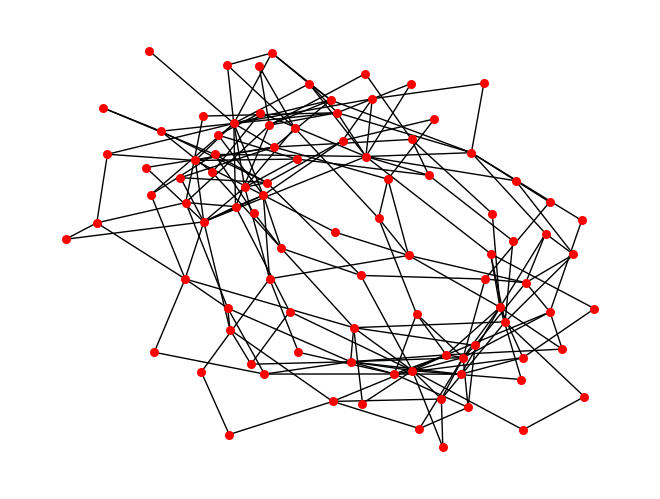

In [72]:
G_opn, pos = make_network(A_opn) #ge
A_opn = ordinal_partition_graph(ts[0], n_mspe, tau_mspe) #adjacency matrix
A_opn = remove_zeros(A_opn) #remove nodes of unused permutationt networkx representation
nx.draw(G_opn, pos, with_labels=False, font_weight='bold', node_color='red', node_size = 30)

### Step 3: Generate the coarse-grained state space network for this system.

Hint: 
```python
teaspoon.SP.network.cgss_graph(ts, B_array, n=None, tau=None)
teaspoon.SP.tsa_tools.cgss_binning(ts, n=None, tau=None, b=12, binning_method='equal_size', plot_binning=False)
```

#### Take $b=8$

In [78]:
# B_array = 
# A_cgss = cgss_graph(YOUR CODE HERE) 
# A_cgss = remove_zeros(A_cgss) 

B_array = tsa_tools.cgss_binning(ts[0], n_mspe, tau_mspe, b=6) #binning array
A_cgss = cgss_graph(ts[0], B_array, n_mspe, tau_mspe) #adjacency matrix
print(A_cgss.shape)
A_cgss = remove_zeros(A_cgss) #remove nodes of unused permutation

(7776, 7776)


In [74]:
A_cgss.shape

(43, 43)

*The correct answer is hidden here. Highlight or double-click to open the cell to see it when you're ready.*

<font color='white'>
B_array = tsa_tools.cgss_binning(ts[0], n_mspe, tau_mspe, b=8) #binning array
A_cgss = cgss_graph(ts[0], B_array, n_mspe, tau_mspe) #adjacency matrix
A_cgss = remove_zeros(A_cgss) #remove nodes of unused permutation
</font>

Run the cell below to plot the coarse grained state space network

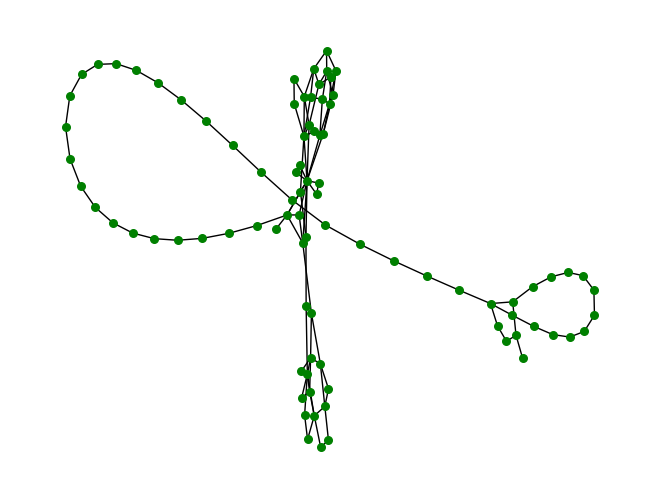

In [79]:
G_cgss, pos = make_network(A_cgss) #get networkx representation
nx.draw(G_cgss, pos, with_labels=False, font_weight='bold', node_color='green', node_size = 30)

### Step 4: Get the persistence diagrams for each network using the different distances

Run the following cell to plot the opn, and cgssn persistence diagrams using the four distance definitions. 

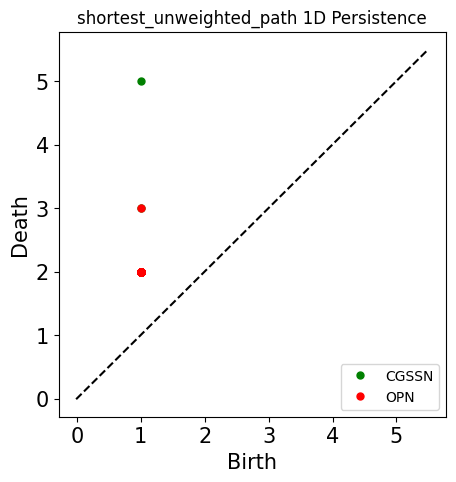

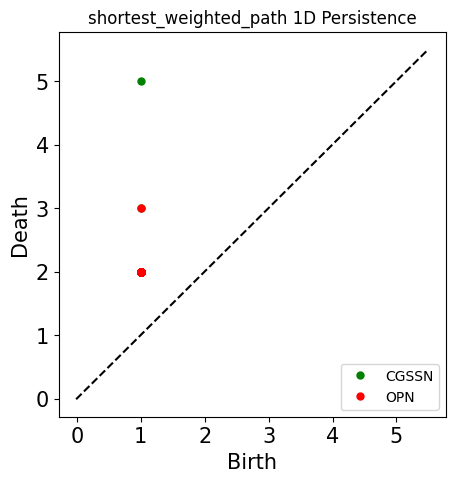

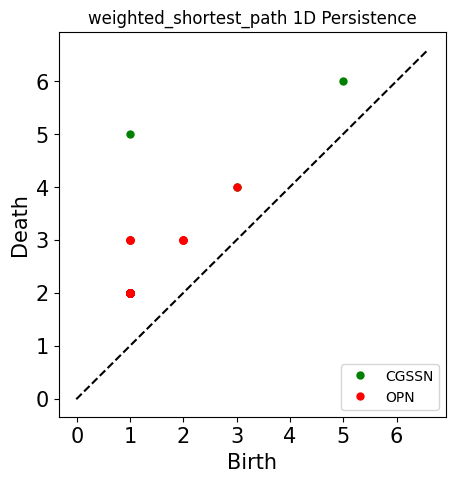

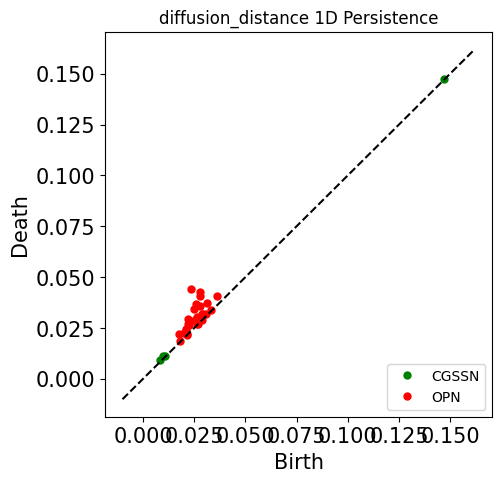

In [80]:
methods = ['shortest_unweighted_path', 'shortest_weighted_path', 
           'weighted_shortest_path', 'diffusion_distance']



for dist in methods:
    plt.figure(figsize=(5,5))
    D_opn = DistanceMatrix(A_opn, method = dist)
    diagram_opn = PH_network(D_opn)
    diagram_opn = diagram_opn[1]
    
    D_cgss = DistanceMatrix(A_cgss, method = dist)
    diagram_cgss = PH_network(D_cgss)
    diagram_cgss = diagram_cgss[1]
    
    max_opn = max(max(diagram_opn[:,0]), max(diagram_opn[:,1]))
    max_cgss = max(max(diagram_cgss[:,0]), max(diagram_cgss[:,1]))
    
    top = max(max_opn, max_cgss)
    plt.plot(diagram_cgss[:,0], diagram_cgss[:,1], '.g', markersize=10, label='CGSSN')
    plt.plot(diagram_opn[:,0], diagram_opn[:,1], '.r', markersize=10, label='OPN')
    plt.plot([-0.01,1.1*top],[-0.01,1.1*top],'--k')
    plt.title(f'{dist} 1D Persistence')
    plt.legend(loc='lower right')
    plt.xlabel('Birth', fontsize=15)
    plt.ylabel('Death', fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.show()
    

Which distances give characteristic results for chaos? 

Hint: If the response is truly periodic, we will only have a single loop in the OPN and CGSSN.

**Challenge Problem:** If you still have time, do the same process for the periodic lorenz system and observe how the persistence diagrams change.

**Extra Problem:** Generate these results for another system in the [teaspoon dynamical systems library](https://teaspoontda.github.io/teaspoon/DynSysLib.html)


## Code not working? Double click this cell, uncomment the code  and run to see the figures generated in this worksheet.

<!-- ![](figures/2-2-wkst-opn.png)
![](figures/2-2-wkst-cgssn.png)
![](figures/2-2-wkst-shortest-unweighted.png)
![](figures/2-2-wkst-shortest-weighted.png)
![](figures/2-2-wkst-weighted-shortest.png)
![](figures/2-2-wkst-diffusion.png) -->